# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [2]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random

First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [3]:
def f(r):
    '''Function to be minimised'''
    x, y = r
    # YOUR CODE HERE
    return (1-x)**2+100*(y-x**2)**2
    
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    dx = -2*(1-x)-200*x*2*(y-x**2)
    dy = 200*(y-x**2)
    return numpy.array([dx,dy])

Before proceeding, ensure that your functions have been written correctly:

In [4]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

In [5]:
def gradientDescent(df, r0, eta, nstep):
    x,y = r0
    history = numpy.empty( (nstep+1, 2) )
    # YOUR CODE HERE
    
    for i in range(0,nstep+1):
        history[i,:]=x,y
        r = (x,y)
        x = x - eta*grad(r)[0]
        y = y - eta*grad(r)[1]
        
    return history


Test your answer:

In [6]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

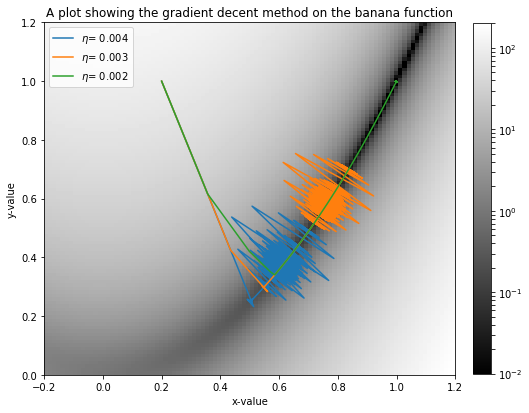

In [13]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)


# Now generate the trajectories:
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point
nsteps=300000
p1=gradientDescent(grad, r0, gammas[0], nsteps)
plt.plot(p1[:,0],p1[:,1],label="$\eta$= 0.004")
p2=gradientDescent(grad, r0, gammas[1], nsteps)
plt.plot(p2[:,0],p2[:,1],label="$\eta$= 0.003")
p3=gradientDescent(grad, r0, gammas[2], nsteps)
plt.plot(p3[:,0],p3[:,1],label="$\eta$= 0.002")
plt.legend()
plt.ylabel("y-value")
plt.xlabel("x-value")
plt.title("A plot showing the gradient decent method on the banana function")
plt.show()

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

$\eta$ = 0.002 is best, as it is small enough that it can "crawl" through the valley to find the minimum without oscillating away from the section of function we are interested in. Unfortunately this process is very computationally intensive, but it does find the minimum.